#### Importing Libraries

In [266]:
# Importing Pandas and NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [267]:
countries_data = pd.read_csv("Country-data.csv")
countries_data.head(5)
countries_data.shape

(167, 10)

### 1. Data Preparation

#### Null values Check 

In [268]:
countries_data.isnull().values.any()
countries_data.isnull().values.sum()
countries_data.isnull().sum()*100/countries_data.shape[0]

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

#### Find the columns which are numeric 

In [269]:
country_cols= list(countries_data.columns)
country_cols.remove('country')
country_cols

['child_mort',
 'exports',
 'health',
 'imports',
 'income',
 'inflation',
 'life_expec',
 'total_fer',
 'gdpp']

#### Calculate the Outliers

In [270]:
for column in country_cols:
    Q1 = countries_data[column].quantile(0.25)
    Q3 = countries_data[column].quantile(0.75)
    IQR = Q3 - Q1
    countries_wo_outliers = countries_data[(countries_data[column] >= Q1 - 1.5*IQR) & (countries_data[column] <= Q3 + 1.5*IQR)]

In [271]:
#Percentage of values retention
len(countries_wo_outliers)/len(countries_data)

0.8502994011976048

In [272]:
countries_data = countries_data[(countries_data[column] >= Q1 - 1.5*IQR) & (countries_data[column] <= Q3 + 1.5*IQR)]

In [273]:
#Recalculate the index after removing the outliers - will be useful during merging 
countries_data = countries_data.reset_index(drop=True)

#### Scaling of numeric values

In [274]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
scaled_data = standard_scaler.fit_transform(countries_data.iloc[:,1:])

C:\Users\I332724\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\I332724\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


### 2. Principal Component Analysis

In [275]:
from sklearn.decomposition import PCA
pca = PCA(svd_solver='randomized', random_state=42)

In [276]:
pca.fit(scaled_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=False)

In [277]:
pca.components_

array([[-0.43268279,  0.27511883,  0.07460737,  0.14799877,  0.41658057,
        -0.15457041,  0.42110943, -0.41680476,  0.40141573],
       [ 0.12705284,  0.41715275,  0.26439674,  0.72757198, -0.15165935,
        -0.34088789, -0.22222487,  0.07800451, -0.12609846],
       [ 0.14035908,  0.53942174, -0.63092374,  0.11593252,  0.20770985,
         0.44702842, -0.08811097,  0.15202484,  0.06297233],
       [ 0.2652956 ,  0.01131698,  0.59810059, -0.01482723,  0.33538809,
         0.41102888, -0.18304067,  0.25388186,  0.43835625],
       [-0.29344799,  0.03806039,  0.27002758,  0.21766343, -0.29577481,
         0.68124488,  0.22844879, -0.22152966, -0.373237  ],
       [ 0.15042134, -0.06059192, -0.03128897, -0.02627613,  0.10702339,
         0.08139198, -0.60766609, -0.76446833, -0.01685351],
       [ 0.02479168, -0.64964849, -0.30382792,  0.61240425,  0.02790418,
         0.13643725,  0.04904149,  0.02067456,  0.29625256],
       [ 0.74629402,  0.07540523,  0.01385579, -0.01324801, -0

In [278]:
pca.explained_variance_ratio_

array([0.45397868, 0.16710247, 0.13491987, 0.09975241, 0.07860391,
       0.02865835, 0.01877519, 0.01080293, 0.00740618])

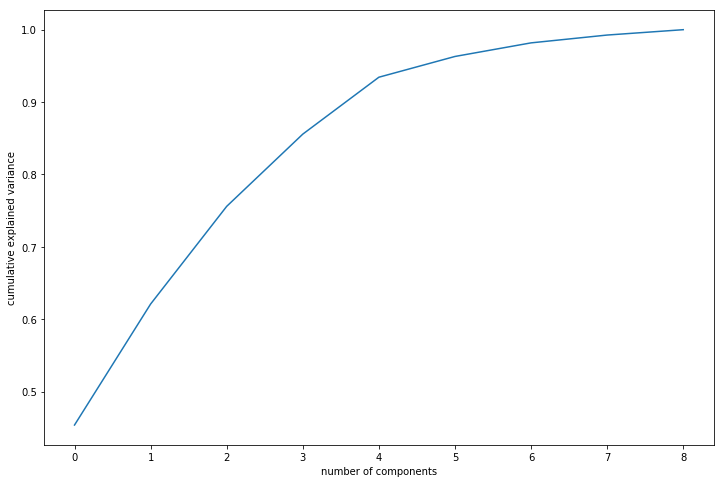

In [279]:
#The Cumulative Explained Variance Calculation to find the optimum number of k
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Derived from the above graph as k = 4 explains more than 95% of data

In [280]:
k=4

#### Variance greater than 80%

In [281]:
sum(pca.explained_variance_ratio_[:4])

0.8557534341447292

#### Fix k=4

In [282]:
from sklearn.decomposition import IncrementalPCA
pca_final = IncrementalPCA(n_components=4)

In [283]:
countrydata_pca = pca_final.fit_transform(scaled_data)
countrydata_pca.shape

(142, 4)

In [284]:
countrydata_pca = np.transpose(countrydata_pca)
countrydata_pca_df = pd.DataFrame({'PC1':countrydata_pca[0],'PC2':countrydata_pca[1],'PC3':countrydata_pca[2],'PC4':countrydata_pca[3]})

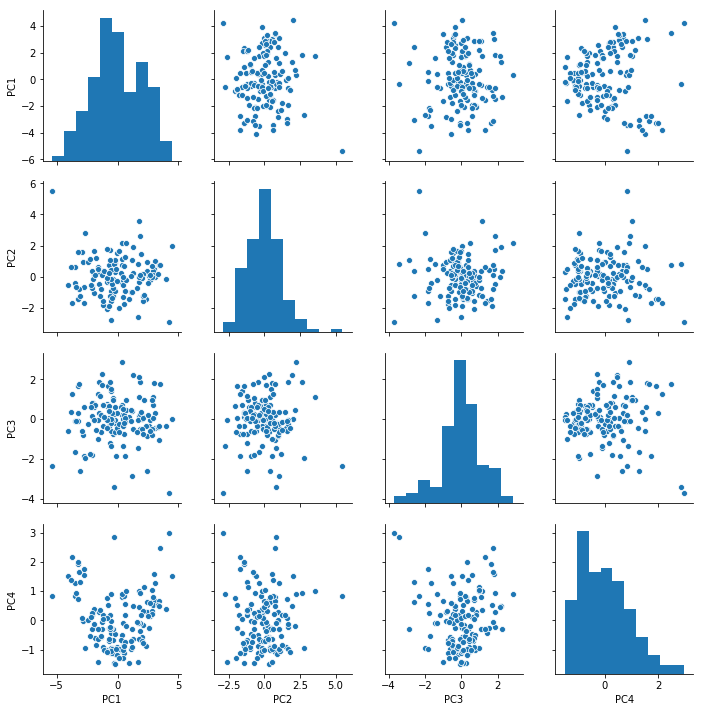

In [285]:
#Different PCA's are visually represented
sns.pairplot(countrydata_pca_df)

In [286]:
#Outliers After PCA

In [287]:
for column in countrydata_pca_df.columns:
    Q1 = countrydata_pca_df[column].quantile(0.25)
    Q3 = countrydata_pca_df[column].quantile(0.75)
    IQR = Q3 - Q1
    countrydata_pca_df_wo_outliers = countrydata_pca_df[(countrydata_pca_df[column] >= Q1 - 1.5*IQR) & (countrydata_pca_df[column] <= Q3 + 1.5*IQR)]

Since the PCA's are gradually increasing and removing the outliers after PCA does not the data set by a huge margin, since it is already taken care of, outliers are not removed here 

### 3. Clustering

#### 3.1 K-Means Clustering

#### Hopkins Statistic

In [288]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
    
    rand_X = sample(range(0, n, 1), m)

    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [289]:
hopkins(countrydata_pca_df)

0.7394530757703028

Since the value is > 0.5 the given dataset has a good tendency to form clusters.

#### Silhoutte score

In [290]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sse_ = []
for k in range(2, 15):
    kmeans = KMeans(n_clusters=k).fit(countrydata_pca_df)
    sse_.append([k, silhouette_score(countrydata_pca_df, kmeans.labels_)]) 

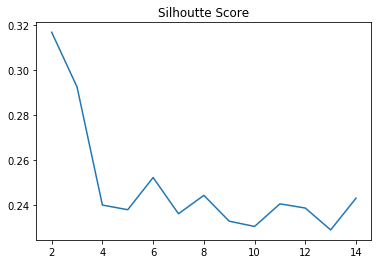

In [320]:
plt.title('Silhoutte Score')
plt.plot(pd.DataFrame(sse_)[0], pd.DataFrame(sse_)[1])

#### Elbow curve determining Cluster Inertia

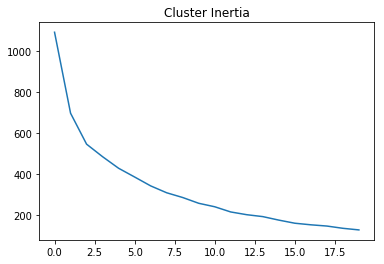

In [321]:
## From the above analysis we find that 4 seems to be a good number of clusters for K means algorithm
# elbow curve method determining sum of squared distances
ssd = []
for num_clusters in list(range(1,21)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=50)
    model_clus.fit(countrydata_pca_df)
    ssd.append(model_clus.inertia_)

plt.title('Cluster Inertia')
plt.plot(ssd)

In [293]:
#Here also we're seeing a distinct bend at around 4 clusters. Hence it seems a good K to choose.
#Let's perform K means using K=4
model_clus4 = KMeans(n_clusters = 4, max_iter=50)
model_clus4.fit(countrydata_pca_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [294]:
countrydata_pca_df.index = pd.RangeIndex(len(countrydata_pca_df.index))

In [295]:
countrydata_pca_km = pd.concat([countrydata_pca_df, pd.Series(model_clus4.labels_)], axis=1)

In [296]:
countrydata_pca_km.columns = ['PC 1','PC 2','PC 3','PC 4','Cluster ID']
countrydata_pca_km.shape

(142, 5)

Final Check by the distribution of data equally throughout all the clusters

In [297]:
countrydata_pca_km['Cluster ID'].value_counts()

1    42
0    42
2    35
3    23
Name: Cluster ID, dtype: int64

#### Visualization of Different Clusters with PCA

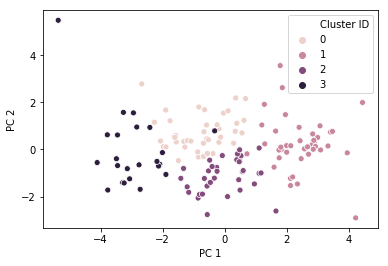

In [298]:
#Visualization Of the Difference in the PCA's
sns.scatterplot(x="PC 1", y= "PC 2", data=countrydata_pca_km,hue="Cluster ID")

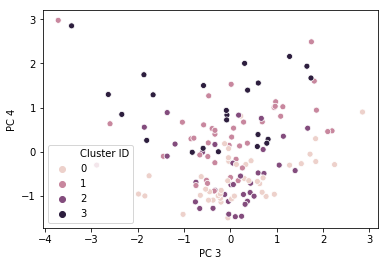

In [299]:
#Visualization Of the Difference in the PCA's
sns.scatterplot(x="PC 3", y= "PC 4", data=countrydata_pca_km,hue="Cluster ID")

In [300]:
#Merge both the dataframes to derive cluster id's for the original data set
final_cluster_df = pd.merge(countries_data,countrydata_pca_km,left_index=True,right_index=True)

#### Visualization of cluster variables against original variables

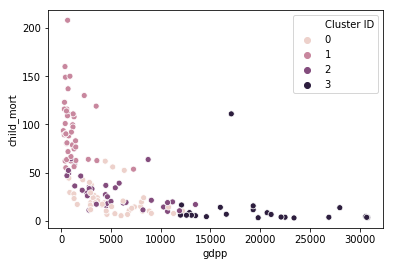

In [301]:
sns.scatterplot(x="gdpp", y= "child_mort", data=final_cluster_df,hue="Cluster ID")

In [302]:
#Calculate mean for all the variables
clu_child_mort = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).child_mort.mean())
clu_exports    = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).exports.mean())
clu_health     = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).health.mean())
clu_imports    = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).imports.mean())
clu_income     = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).income.mean())
clu_inflation  = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).inflation.mean())
clu_life_expec = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).life_expec.mean())
clu_total_fer  = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).total_fer.mean())
clu_gdpp       = pd.DataFrame(final_cluster_df.groupby(["Cluster ID"]).gdpp.mean())

In [303]:
fin_df_km = pd.concat([pd.Series([0,1,2,3]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,
               clu_total_fer,clu_gdpp], axis=1)

In [304]:
fin_df_km.columns = ['Cluster ID', 'child_mort', 'exports', 'health', 'imports',
       'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'] 

In [305]:
#Final DataFrame consisting mean for all the clusters
fin_df_km

,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,21.633333,48.216667,6.877143,61.173810,10220.952381,4.560024,71.735714,2.335476,5153.238095
1,1,96.407143,26.090714,6.399762,42.030952,2422.214286,11.770119,58.930952,5.120238,1153.857143
2,2,29.531429,27.168257,5.390000,30.024740,10524.285714,12.223314,71.888571,2.561143,5137.600000
3,3,11.856522,57.391304,7.214348,53.543478,28413.043478,4.672739,76.800000,1.929565,19813.043478


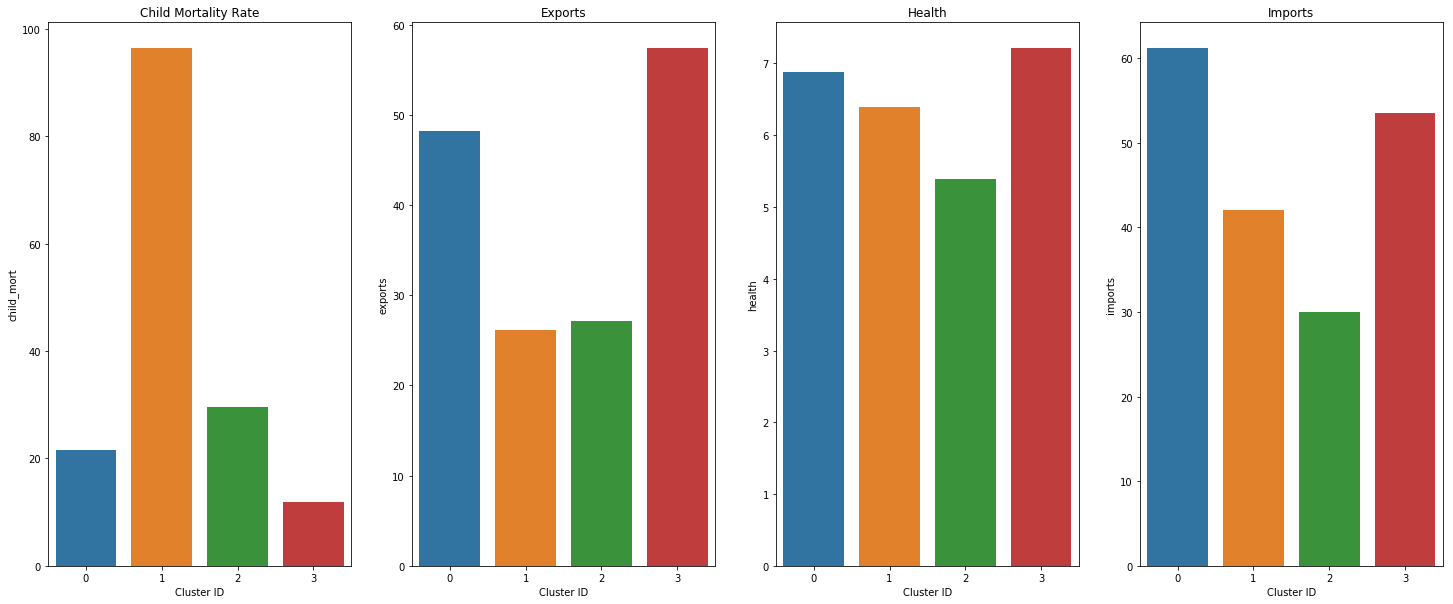

In [306]:
plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.title('Child Mortality Rate')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["child_mort"])

plt.subplot(1,4,2)
plt.title('Exports')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["exports"])

plt.subplot(1,4,3)
plt.title('Health')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["health"])

plt.subplot(1,4,4)
plt.title('Imports')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["imports"])


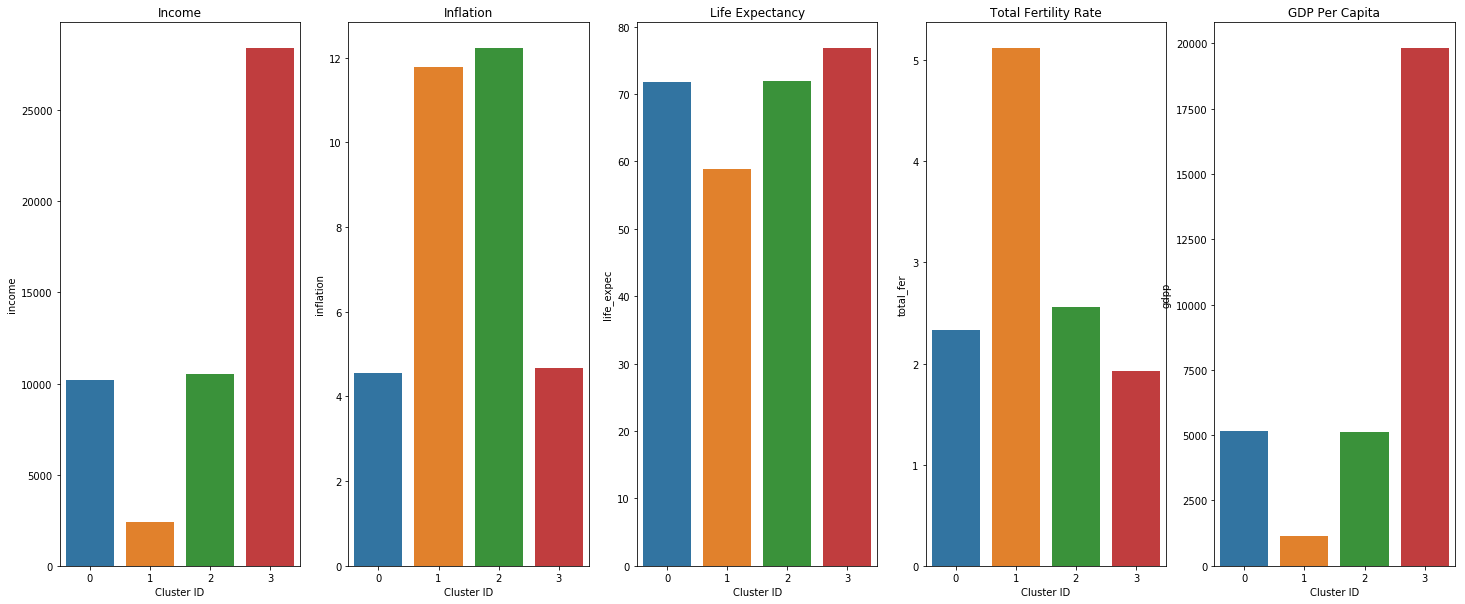

In [307]:
plt.figure(figsize=(25,10))
plt.subplot(1,5,1)
plt.title('Income')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["income"])

plt.subplot(1,5,2)
plt.title('Inflation')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["inflation"])

plt.subplot(1,5,3)
plt.title('Life Expectancy')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["life_expec"])

plt.subplot(1,5,4)
plt.title('Total Fertility Rate')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["total_fer"])

plt.subplot(1,5,5)
plt.title('GDP Per Capita')
sns.barplot(x=fin_df_km["Cluster ID"], y=fin_df_km["gdpp"])


In [308]:
final_cluster_df = final_cluster_df.drop(['PC 1','PC 2','PC 3','PC 4'],1)

### Cluster 2 is the bad cluster

In [309]:

Cluster2df = final_cluster_df[final_cluster_df['Cluster ID'] ==2]
Cluster2df = Cluster2df.sort_values(by=['child_mort', 'exports', 'health', 'imports','income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], 
                       ascending=[False, True, True, False,True,False,True,True,True])
Cluster2df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
92,Myanmar,64.4,0.109,1.97,0.0659,3720,7.040,66.8,2.41,988,2
47,Gabon,63.7,57.700,3.50,18.9000,15400,16.600,62.9,4.08,8750,2
59,India,58.8,22.600,4.05,27.1000,4410,8.980,66.2,2.60,1350,2
124,Tajikistan,52.4,14.900,5.98,58.6000,2110,12.500,69.6,3.51,738,2
10,Bangladesh,49.4,16.000,3.52,21.8000,2440,7.140,70.4,2.33,758,2
94,Nepal,47.0,9.580,5.25,36.4000,1990,15.100,68.3,2.61,592,2
16,Bolivia,46.6,41.200,4.84,34.3000,5410,8.780,71.6,3.20,1980,2
7,Azerbaijan,39.2,54.300,5.88,20.7000,16000,13.800,69.1,1.92,5840,2
62,Iraq,36.9,39.400,8.41,34.1000,12700,16.600,67.2,4.56,4500,2
136,Uzbekistan,36.3,31.700,5.81,28.5000,4240,16.500,68.8,2.34,1380,2


#### 3.2 Hierarchical Clustering

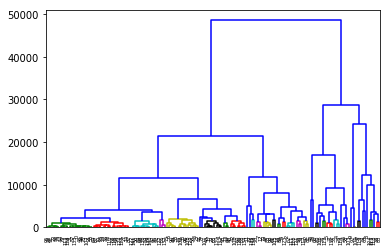

In [310]:
from scipy.cluster.hierarchy import dendrogram, linkage,cut_tree  
mergings = linkage(countries_data.iloc[:,1:], method = "complete", metric='euclidean')
dendrogram(mergings,color_threshold=2000)
plt.show()

In [311]:
#Create the Hierarchial Clustering DataFrame with Cluster ID's
clusterCut = pd.Series(cut_tree(mergings, n_clusters = 3).reshape(-1,))
countries_data_hc = pd.concat([countries_data, clusterCut], axis=1)
countries_data_hc.columns = ['country','child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp','Cluster ID']

In [312]:
#Calculate mean for all the variables
clu_child_mort = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).child_mort.mean())
clu_exports    = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).exports.mean())
clu_health     = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).health.mean())
clu_imports    = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).imports.mean())
clu_income     = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).income.mean())
clu_inflation  = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).inflation.mean())
clu_life_expec = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).life_expec.mean())
clu_total_fer  = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).total_fer.mean())
clu_gdpp       = pd.DataFrame(countries_data_hc.groupby(["Cluster ID"]).gdpp.mean())

In [313]:
fin_df_hc = pd.concat([pd.Series([0,1,2]),clu_child_mort,clu_exports,clu_health,clu_imports,clu_income,clu_inflation,clu_life_expec,
               clu_total_fer,clu_gdpp], axis=1)

In [314]:
fin_df_hc.columns = ['Cluster ID', 'child_mort', 'exports', 'health', 'imports',
       'income', 'inflation', 'life_expec', 'total_fer', 'gdpp'] 

In [315]:
fin_df_hc

,Cluster ID,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,52.678571,33.202670,6.335179,45.077374,6748.776786,9.363438,66.887500,3.464821,3362.267857
1,1,16.288235,56.347059,6.202353,52.247059,22041.176471,7.222000,73.958824,2.050588,12272.941176
2,2,6.700000,55.015385,7.479231,52.315385,32484.615385,3.821231,78.600000,1.864615,24246.153846


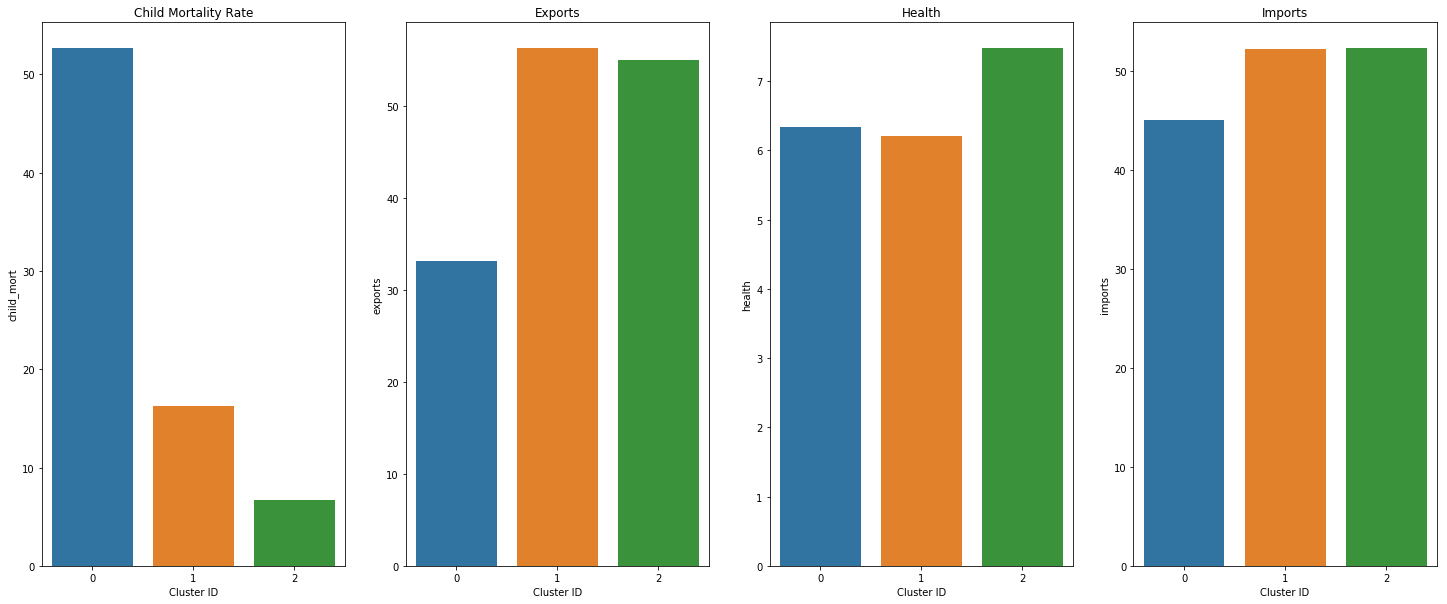

In [316]:
plt.figure(figsize=(25,10))
plt.subplot(1,4,1)
plt.title('Child Mortality Rate')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["child_mort"])

plt.subplot(1,4,2)
plt.title('Exports')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["exports"])

plt.subplot(1,4,3)
plt.title('Health')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["health"])

plt.subplot(1,4,4)
plt.title('Imports')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["imports"])


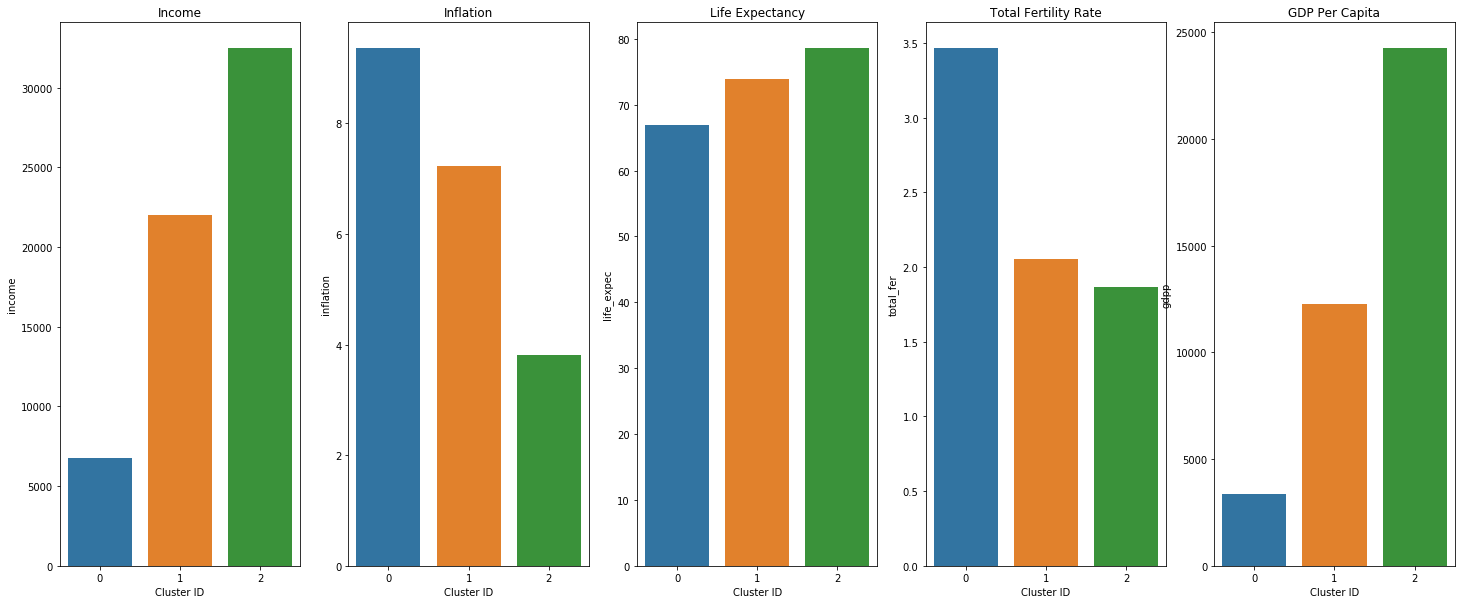

In [317]:
plt.figure(figsize=(25,10))
plt.subplot(1,5,1)
plt.title('Income')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["income"])

plt.subplot(1,5,2)
plt.title('Inflation')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["inflation"])

plt.subplot(1,5,3)
plt.title('Life Expectancy')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["life_expec"])

plt.subplot(1,5,4)
plt.title('Total Fertility Rate')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["total_fer"])

plt.subplot(1,5,5)
plt.title('GDP Per Capita')
sns.barplot(x=fin_df_hc["Cluster ID"], y=fin_df_hc["gdpp"])


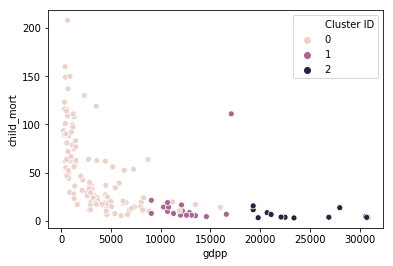

In [326]:
sns.scatterplot(x="gdpp", y= "child_mort", data=countries_data_hc,hue="Cluster ID")

### Cluster 0 is the bad cluster

In [324]:
countries_hc_0df = countries_data_hc[countries_data_hc['Cluster ID'] ==0]

In [325]:
countries_hc_0df = countries_hc_0df.sort_values(by=['child_mort', 'exports', 'health', 'imports','income', 'inflation', 'life_expec', 'total_fer', 'gdpp'], 
                       ascending=[False, True, True, False,True,False,True,True,True])
countries_hc_0df

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Cluster ID
57,Haiti,208.0,15.30,6.91,64.7,1500,5.450,32.1,3.33,662,0
113,Sierra Leone,160.0,16.80,13.10,34.5,1220,17.200,55.0,5.20,399,0
27,Chad,150.0,36.80,4.53,43.5,1930,6.390,56.5,6.59,897,0
26,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,0
82,Mali,137.0,22.80,4.98,35.1,1870,4.370,59.5,6.55,708,0
96,Nigeria,130.0,25.30,5.07,17.4,5150,104.000,60.5,5.84,2330,0
95,Niger,123.0,22.20,5.16,49.1,814,2.550,58.8,7.49,348,0
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,0
21,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,0
32,"Congo, Dem. Rep.",116.0,41.10,7.91,49.6,609,20.800,57.5,6.54,334,0


### 4. Arriving Results

Thus, Top 5 countries that are in dire help derived by both hierarchical and k-means clustering are :
1. Haiti
2. Sierra Leone	
3. Chad	
4. Central African Republic	
5. Mali